In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Univariate Analysis

In [21]:
file = pd.read_csv("Big_Black_Money_Dataset.csv")
file.head()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,TX0000000001,NaN,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,NaN,1,Bank_40,Singapore
1,TX0000000002,NaN,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,NaN,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1.0,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7.0,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1.0,9,Bank_57,Luxembourg


In [23]:
file.shape[0]
file.shape[1]
file.shape

(10000, 14)

In [25]:
file.columns

Index(['Transaction ID', 'Country', 'Amount (USD)', 'Transaction Type',
       'Date of Transaction', 'Person Involved', 'Industry',
       'Destination Country', 'Reported by Authority', 'Source',
       'Money Laundering Risk Score', 'Shell Companies Involved',
       'Financial Institution', 'Tax Haven Country'],
      dtype='object')

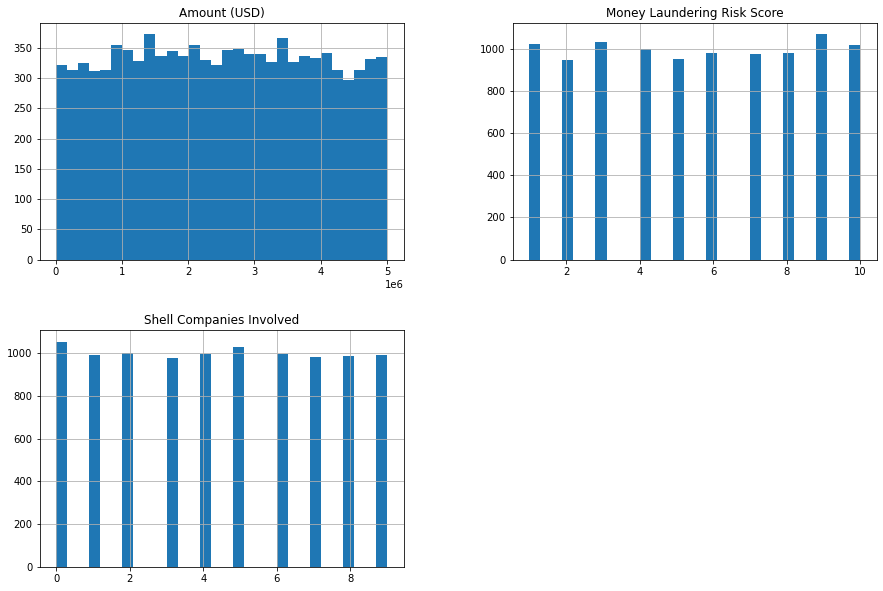

In [24]:
file.hist(bins=30, figsize=(15, 10))
plt.show()

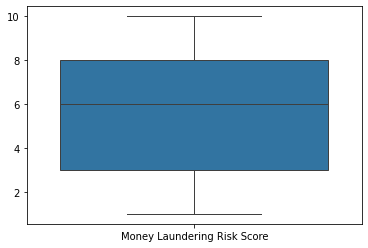

In [26]:
sns.boxplot(data=file[['Money Laundering Risk Score']])  
plt.show()

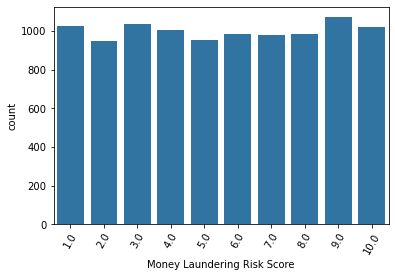

In [28]:
sns.countplot(data=file, x='Money Laundering Risk Score')
plt.xticks(rotation=60)
plt.show()

In [27]:
file.drop('Country',axis=1,inplace=True)
file.head()

,Transaction ID,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,TX0000000001,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,NaN,1,Bank_40,Singapore
1,TX0000000002,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,NaN,0,Bank_461,Bahamas
2,TX0000000003,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1.0,3,Bank_387,Switzerland
3,TX0000000004,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7.0,2,Bank_353,Panama
4,TX0000000005,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1.0,9,Bank_57,Luxembourg


In [29]:
file.describe()

,Amount (USD),Money Laundering Risk Score,Shell Companies Involved
count,1.000000e+04,9993.000000,10000.000000
mean,2.501818e+06,5.525768,4.469400
std,1.424364e+06,2.893416,2.879773
min,1.003180e+04,1.000000,0.000000
25%,1.279005e+06,3.000000,2.000000
50%,2.501310e+06,6.000000,4.000000
75%,3.722416e+06,8.000000,7.000000
max,4.999812e+06,10.000000,9.000000


In [31]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  object 
 1   Amount (USD)                 10000 non-null  float64
 2   Transaction Type             10000 non-null  object 
 3   Date of Transaction          10000 non-null  object 
 4   Person Involved              10000 non-null  object 
 5   Industry                     10000 non-null  object 
 6   Destination Country          10000 non-null  object 
 7   Reported by Authority        10000 non-null  bool   
 8   Source                       10000 non-null  object 
 9   Money Laundering Risk Score  9993 non-null   float64
 10  Shell Companies Involved     10000 non-null  int64  
 11  Financial Institution        10000 non-null  object 
 12  Tax Haven Country            10000 non-null  object 
dtypes: bool(1), float

In [30]:
file.isnull().sum()

Transaction ID                 0
Amount (USD)                   0
Transaction Type               0
Date of Transaction            0
Person Involved                0
Industry                       0
Destination Country            0
Reported by Authority          0
Source                         0
Money Laundering Risk Score    7
Shell Companies Involved       0
Financial Institution          0
Tax Haven Country              0
dtype: int64

In [32]:
file.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool>

In [35]:
file = pd.read_csv("Big_Black_Money_Dataset.csv")
file.Country.isnull()

0        True
1        True
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998     True
9999    False
Name: Country, Length: 10000, dtype: bool

Country
China           1036
South Africa    1026
UK              1014
Brazil          1003
Russia           997
Singapore        995
India            990
Switzerland      985
UAE              975
USA              973
Name: count, dtype: int64

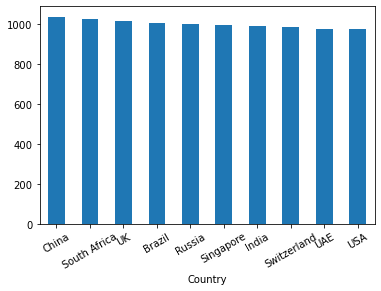

In [36]:
file.Country.value_counts().plot(kind="bar",rot=30)
file.Country.value_counts() #We can also find counts of other elements in that particular column

Handling Missing values

In [37]:
file.dropna(inplace=True)
file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9989 entries, 2 to 9999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               9989 non-null   object 
 1   Country                      9989 non-null   object 
 2   Amount (USD)                 9989 non-null   float64
 3   Transaction Type             9989 non-null   object 
 4   Date of Transaction          9989 non-null   object 
 5   Person Involved              9989 non-null   object 
 6   Industry                     9989 non-null   object 
 7   Destination Country          9989 non-null   object 
 8   Reported by Authority        9989 non-null   bool   
 9   Source                       9989 non-null   object 
 10  Money Laundering Risk Score  9989 non-null   float64
 11  Shell Companies Involved     9989 non-null   int64  
 12  Financial Institution        9989 non-null   object 
 13  Tax Haven Country      

In [38]:
file = pd.read_csv("Big_Black_Money_Dataset.csv")
file['Country'].fillna('No country',inplace=True)
file.head()

/tmp/ipykernel_595495/669469976.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  file['Country'].fillna('No country',inplace=True)


,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,TX0000000001,No country,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,NaN,1,Bank_40,Singapore
1,TX0000000002,No country,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,NaN,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1.0,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7.0,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1.0,9,Bank_57,Luxembourg


/tmp/ipykernel_595495/3322803543.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  file["Money Laundering Risk Score"].fillna(file["Money Laundering Risk Score"].mean(), inplace=True)


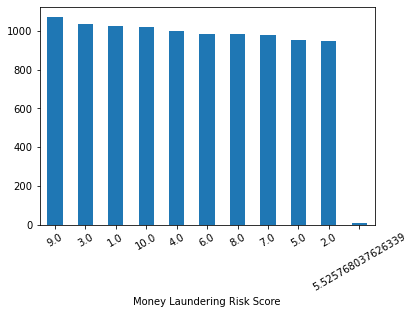

In [39]:
file = pd.read_csv("Big_Black_Money_Dataset.csv")
#In dataset first two row have no values for 'Money Laundering Risk Score' column so we are replacing them by the mean of the column
file["Money Laundering Risk Score"].fillna(file["Money Laundering Risk Score"].mean(), inplace=True)
file['Money Laundering Risk Score']
file['Money Laundering Risk Score'].value_counts().plot(kind="bar",rot=30)

# sns.histplot(file['Money Laundering Risk Score'], kde=False, bins=30)
plt.show()

/tmp/ipykernel_595495/3482032816.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  file['Country'].fillna('No country',inplace=True)


Country
Brazil          5.576271
China           5.506280
India           5.613131
No country      6.750000
Russia          5.428285
Singapore       5.585930
South Africa    5.474146
Switzerland     5.553862
UAE             5.480000
UK              5.542406
USA             5.493306
Name: Money Laundering Risk Score, dtype: float64

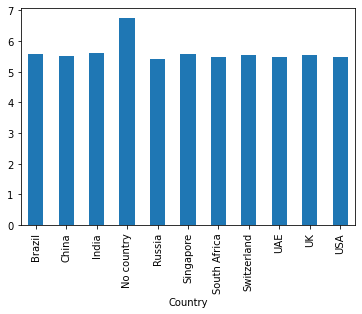

In [40]:
file = pd.read_csv("Big_Black_Money_Dataset.csv")
file['Country'].fillna('No country',inplace=True)
file.groupby(by='Country')['Money Laundering Risk Score'].mean().sort_index().plot.bar()
file.groupby(by='Country')['Money Laundering Risk Score'].mean()

In [41]:
pd.get_dummies(file['Source'], drop_first=True)


,Legal
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,True
9997,False
9998,False


<AxesSubplot:xlabel='Money Laundering Risk Score'>

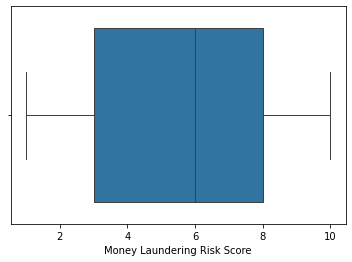

In [42]:
file = pd.read_csv("Big_Black_Money_Dataset.csv")
sns.boxplot(x=file['Money Laundering Risk Score'].dropna())

Variables Analysis

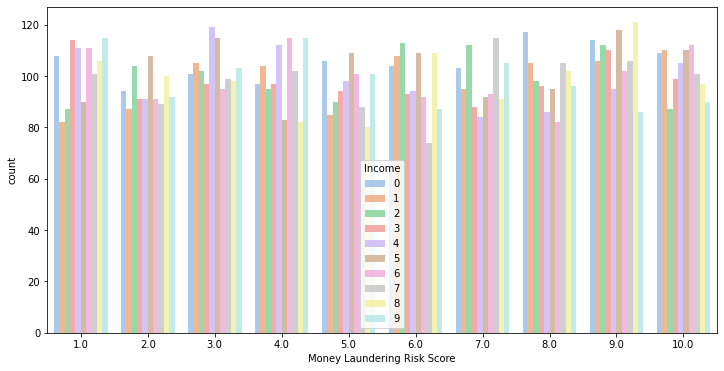

In [43]:
file = pd.read_csv("Big_Black_Money_Dataset.csv")

plt.figure(figsize=(12, 6))
sns.countplot(data=file, x='Money Laundering Risk Score', hue='Shell Companies Involved',palette='pastel')
plt.legend(title='Income')
plt.show()

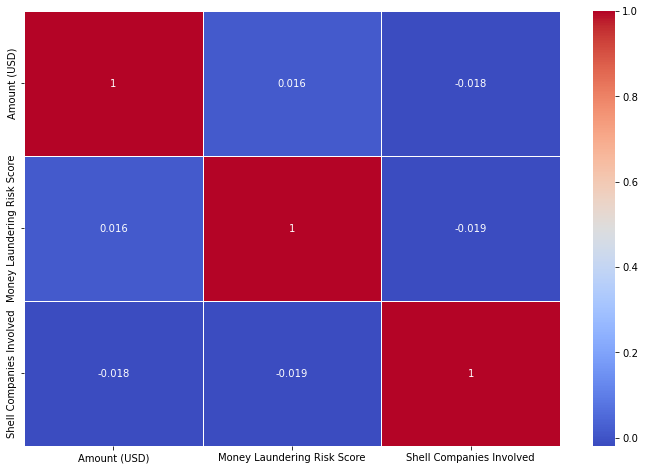

In [44]:
plt.figure(figsize=(12, 8))
numerical = file.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = file[numerical].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

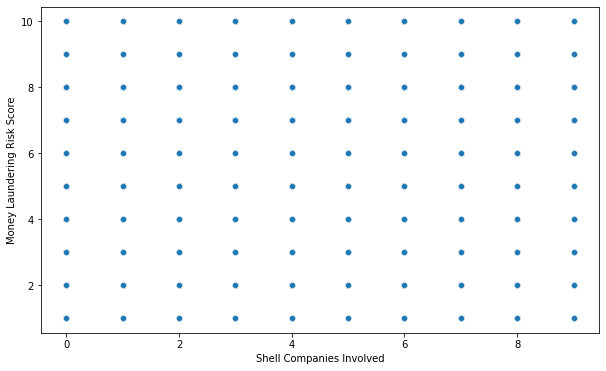

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Shell Companies Involved', y='Money Laundering Risk Score', data=file)
plt.show()

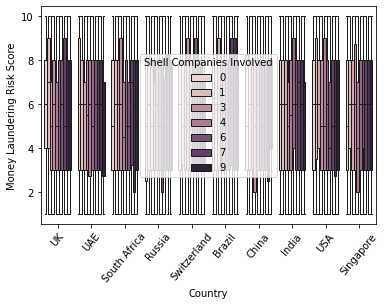

In [46]:
sns.boxplot(data=file, x="Country", y="Money Laundering Risk Score", hue="Shell Companies Involved")
plt.xticks(rotation='50')
plt.show()

/tmp/ipykernel_595495/2692877732.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


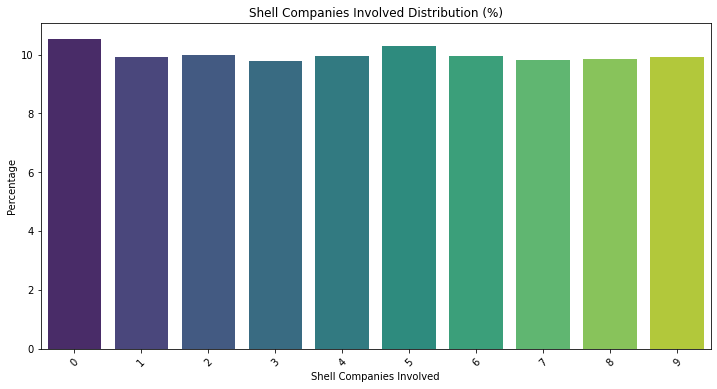

In [47]:
counts = file['Shell Companies Involved'].value_counts(normalize=True) * 100
plt.figure(figsize=(12, 6))
sns.barplot(x=counts.index, y=counts.values, palette='viridis')
plt.title('Shell Companies Involved Distribution (%)')
plt.xlabel('Shell Companies Involved')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

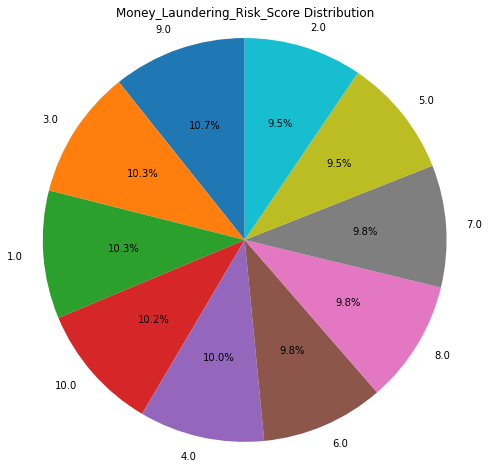

In [48]:
Money_Laundering_Risk_Score = file['Money Laundering Risk Score'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(Money_Laundering_Risk_Score, labels=Money_Laundering_Risk_Score.index, autopct='%1.1f%%', startangle=90)
plt.title('Money_Laundering_Risk_Score Distribution')
plt.axis('equal')
plt.show()

In [49]:
print("Descriptive Statistics for Shell Companies Involved")
print(f"Min: {file['Shell Companies Involved'].min()}")
print(f"Max: {file['Shell Companies Involved'].max()}")
print(f"Mean: {file['Shell Companies Involved'].mean()}")
print(f"Median: {file['Shell Companies Involved'].median()}")
print(f"Mode: {file['Shell Companies Involved'].mode()[0]}")
print(f"Range: {file['Shell Companies Involved'].max() - file['Shell Companies Involved'].min()}")
print(f"Variance: {file['Shell Companies Involved'].var()}")
print(f"Standard Deviation: {file['Shell Companies Involved'].std()}")

Descriptive Statistics for Shell Companies Involved
Min: 0
Max: 9
Mean: 4.4694
Median: 4.0
Mode: 0
Range: 9
Variance: 8.29309294929493
Standard Deviation: 2.8797730725345234


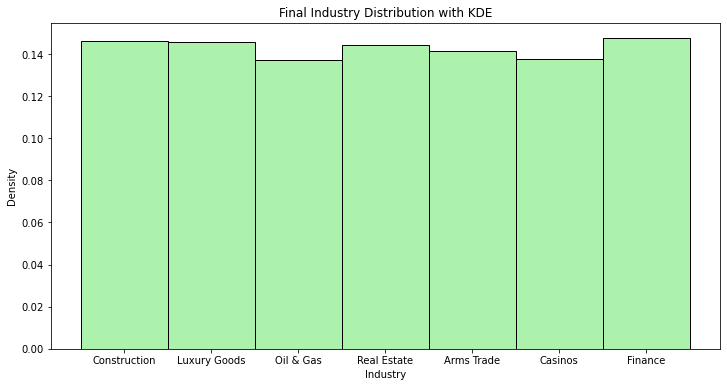

In [50]:
plt.figure(figsize=(12, 6))
sns.histplot(data=file['Industry'], bins=30, color='lightgreen', stat="density")
plt.title('Final Industry Distribution with KDE')
plt.xlabel('Industry')
plt.ylabel('Density')
plt.show()

/tmp/ipykernel_595495/1954333790.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Money Laundering Risk Score', y='Shell Companies Involved', data=file, palette='Set2')


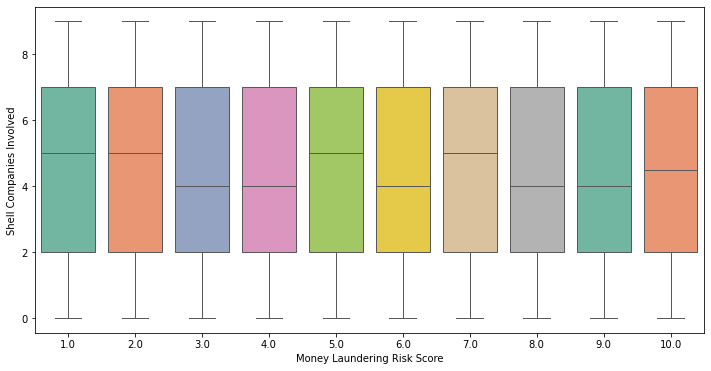

In [51]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Money Laundering Risk Score', y='Shell Companies Involved', data=file, palette='Set2')
plt.show()

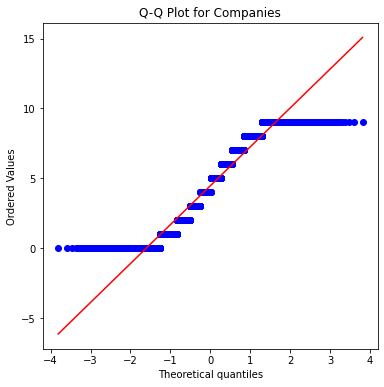

In [52]:
plt.figure(figsize=(6, 6))
stats.probplot(file['Shell Companies Involved'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Companies')
plt.show()

/tmp/ipykernel_595495/369263104.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=file['Money Laundering Risk Score'], palette='Set3')


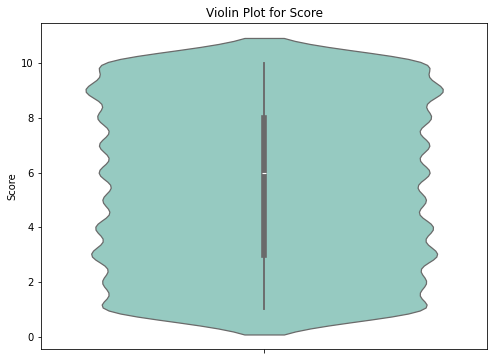

In [53]:
plt.figure(figsize=(8, 6))
sns.violinplot(y=file['Money Laundering Risk Score'], palette='Set3')
plt.title('Violin Plot for Score')
plt.ylabel('Score')
plt.show()

Tests


In [54]:
file = pd.read_csv("Big_Black_Money_Dataset.csv")

# Z-score method to detect outliers
column_np = file['Shell Companies Involved'].dropna().to_numpy()
print(np.mean(column_np))
print(np.std(column_np))

z_scores = stats.zscore(column_np)
print(z_scores)

# Identify outliers (using a threshold of 1)
threshold = 1
outliers = column_np[np.abs(z_scores) > threshold]
print(outliers)

df_cleaned_zscore = file[(np.abs(stats.zscore(file['Shell Companies Involved'].dropna())) <= threshold) | file["Shell Companies Involved"].isna()]
df_cleaned_zscore['Shell Companies Involved']

4.4694
2.8796290802810005
[-1.20480795 -1.55207489 -0.51027405 ... -1.55207489  0.18425984
 -0.16300711]
[1 0 9 ... 9 9 0]


2       3
3       2
5       3
7       5
8       6
       ..
9994    2
9995    4
9996    2
9998    5
9999    4
Name: Shell Companies Involved, Length: 5980, dtype: int64

In [55]:
# Detect outliers using IQR method
Q1 = file['Shell Companies Involved'].quantile(0.25)
Q3 = file['Shell Companies Involved'].quantile(0.75)

print(Q1,Q3)

IQR = Q3 - Q1
print(IQR)

column = 'Shell Companies Involved'

# Identify outliers
outliers_iqr = file[column][((file[column] < (Q1 - 1.5 * IQR)) | (file[column] > (Q3 + 1.5 * IQR)))]
print(outliers_iqr)

df_cleaned_iqr = file[~((file[column] < (Q1 - 1.5 * IQR)) | (file[column] > (Q3 + 1.5 * IQR))) | file[column].isna()]
print(df_cleaned_iqr[column])

2.0 7.0
5.0
Series([], Name: Shell Companies Involved, dtype: int64)
0       1
1       0
2       3
3       2
4       9
       ..
9995    4
9996    2
9997    0
9998    5
9999    4
Name: Shell Companies Involved, Length: 10000, dtype: int64


0.005805574755999062

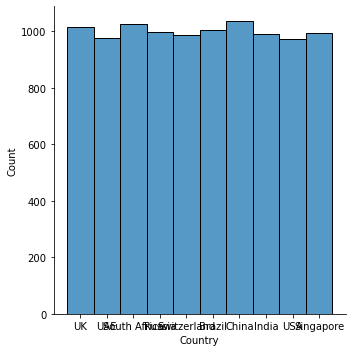

In [56]:
file = pd.read_csv("Big_Black_Money_Dataset.csv")
sns.displot(file['Country'])

file['Shell Companies Involved'].skew()

In [57]:
#chi-square test
from scipy.stats import chi2_contingency
file = pd.read_csv("Big_Black_Money_Dataset.csv")


contingency_table = pd.crosstab(file['Money Laundering Risk Score'], file['Shell Companies Involved'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Squared: {chi2}, p-value: {p}")

Chi-Squared: 87.92294900962918, p-value: 0.28055342440501985


In [58]:
from scipy.stats import ttest_ind

# T-Test 
data1 = file[file['Money Laundering Risk Score'] < 4]['Shell Companies Involved']
data2 = file[file['Money Laundering Risk Score'] >= 4]['Shell Companies Involved']

t_stat, p_value = ttest_ind(data1, data2)
print(f"T-Statistic: {t_stat}, p-value: {p_value}")


from scipy.stats import f_oneway

# ANOVA 
anova_result = f_oneway(data1, data2)
print(f"F-Statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

T-Statistic: 1.5491351628985464, p-value: 0.12138090504181581
F-Statistic: 2.3998197529287055, p-value: 0.12138090504097541


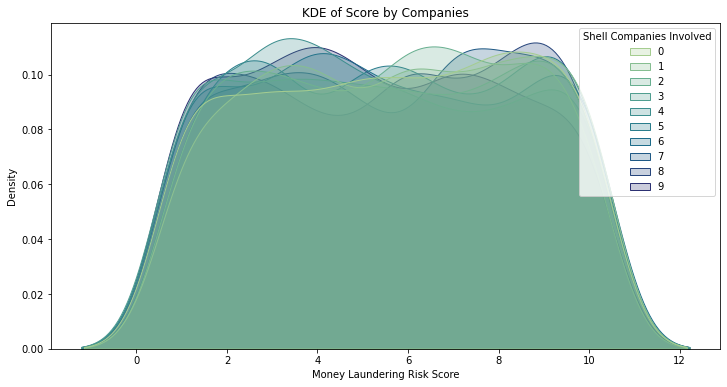

In [59]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=file, x='Money Laundering Risk Score', hue='Shell Companies Involved', fill=True, common_norm=False, palette='crest')
plt.title('KDE of Score by Companies')
plt.show()

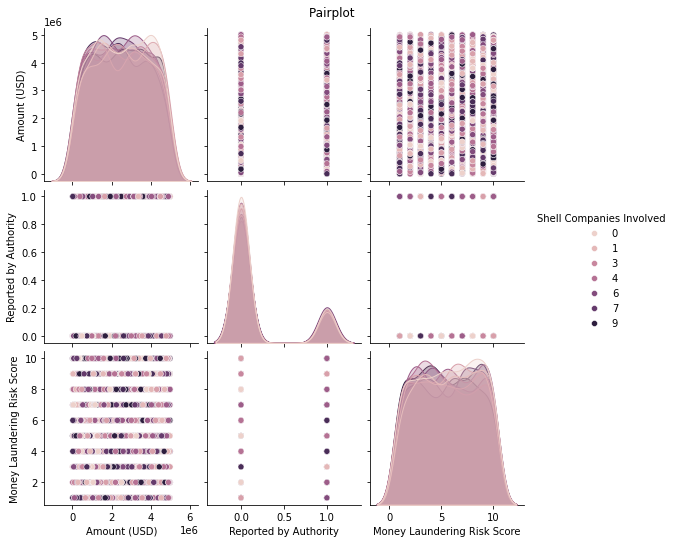

In [60]:
sns.pairplot(file, hue='Shell Companies Involved', diag_kind='kde')
plt.suptitle('Pairplot ', y=1)
plt.show()